# Adult income dataset

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [3]:
# Load the dataset from the web URL
data_url = "https://raw.githubusercontent.com/blaqqqqq/PIMA-Indians-Diabetes-Database/refs/heads/main/adult.csv"
data = pd.read_csv(data_url)

In [4]:
# Display the first 10 rows
data.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [5]:
# Replace '?' with NaN
data.replace("?", pd.NA, inplace=True)

# Drop rows with NaN values
data.dropna(inplace=True)

In [6]:
# Initialize the LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to each categorical column
for column in data.select_dtypes(include='object').columns:
    data[column] = le.fit_transform(data[column])

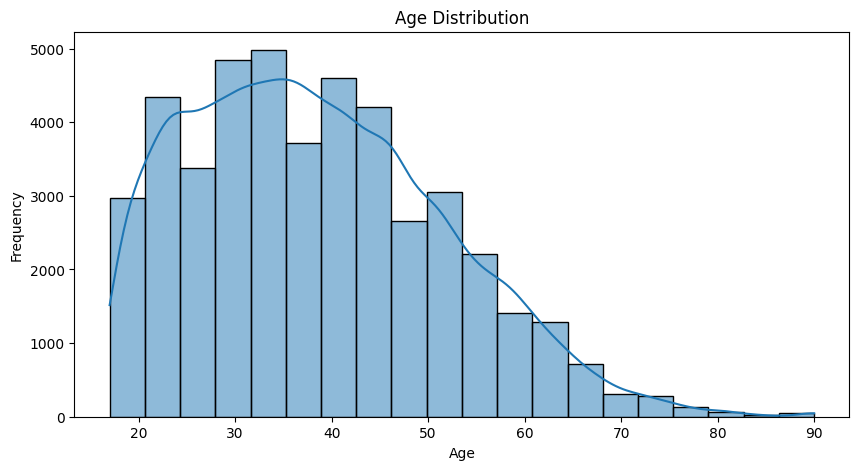

In [7]:
# Visualize the distribution of age
plt.figure(figsize=(10, 5))
sns.histplot(data['age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

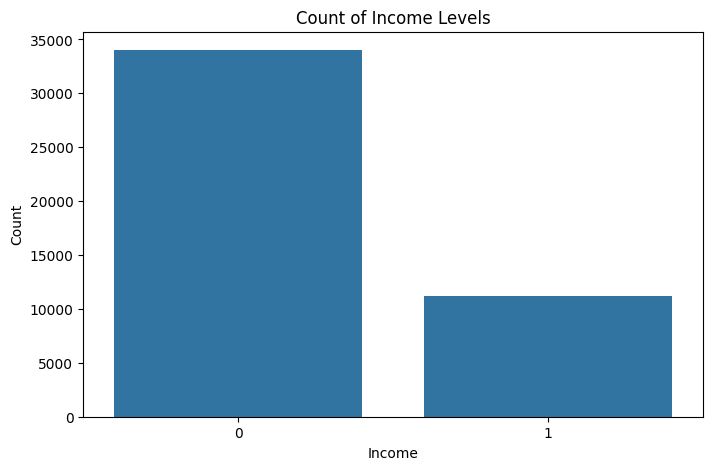

In [8]:
# Count of income levels
plt.figure(figsize=(8, 5))
sns.countplot(x='income', data=data)
plt.title("Count of Income Levels")
plt.xlabel("Income")
plt.ylabel("Count")
plt.show()

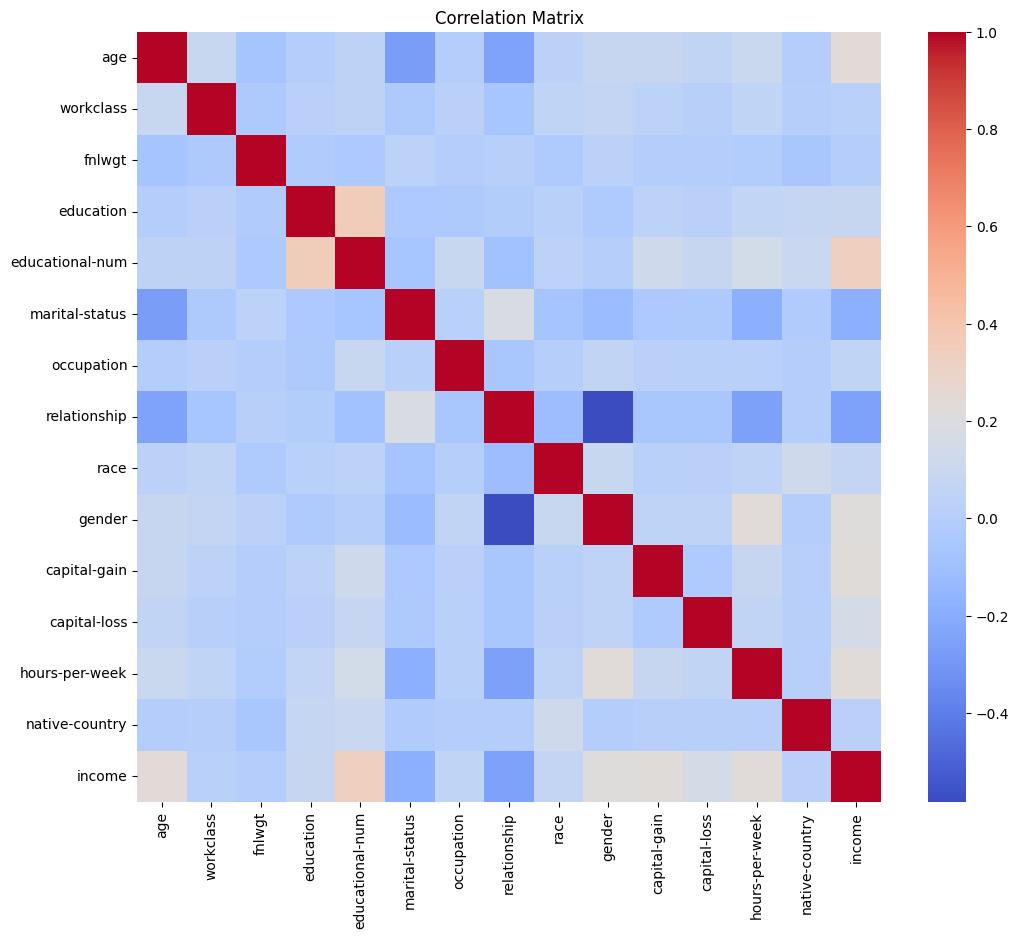

In [9]:
# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [10]:
# Separate features and target variable
X = data.drop('income', axis=1)
y = data['income']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [11]:
# Initialize and train the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)


In [12]:
# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)


In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Logistic Regression model with standardized data
lr_model = LogisticRegression(max_iter=2000)
lr_model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_lr = lr_model.predict(X_test_scaled)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_lr

0.8202992555465468

In [19]:
# Display accuracy of each model
accuracy_scores = {
    "Decision Tree": accuracy_dt,
    "Random Forest": accuracy_rf,
    "Logistic Regression": accuracy_lr
}
accuracy_scores

{'Decision Tree': 0.8062209773715634,
 'Random Forest': 0.8532468489717697,
 'Logistic Regression': 0.8202992555465468}